**Mini Project 1 – News Comparison Analysis by Melih Kurtaran**

In this project, the news span between the first two weeks of December 2019 and December
2020 from New York Times will analyzed and compared

# Part 1 - Webscraping

Starting with importing necessary libraries

In [1]:
#importing the BeautifulSoup Library
from bs4 import BeautifulSoup
import requests
import csv
#and panda for dataframe
import pandas as pd  
#for clearing output in cell
from IPython.display import clear_output
#visualization
import matplotlib.pyplot as plt

Scraping NYTimes data both first two weeks of 2019 December and 2020 December

In [2]:
Table2019Dec = []
for i in range(1,15):
  source = requests.get('https://www.nytimes.com/search?dropmab=true&endDate=201912'+str(i)+'&query=&sort=best&startDate=201912'+str(i)+'&types=article').text
  soup = BeautifulSoup(source,'lxml')
  for Entry in soup.find_all('div', class_='css-1kl114x'):
    Table2019Dec.append(Entry)
  #for logging
  if i%3==0:
    clear_output()
    print(str(round(i*100/31,2))+ "% has completed for December 2019.")
  elif i==14: #it means complted
    clear_output()
    print("Web scrapping has successfully completed for December 2019.")

Table2020Dec = []
for i in range(1,15):
  source = requests.get('https://www.nytimes.com/search?dropmab=true&endDate=202012'+str(i)+'&query=&sort=best&startDate=202012'+str(i)+'&types=article').text
  soup = BeautifulSoup(source,'lxml')
  for Entry in soup.find_all('div', class_='css-1kl114x'):
    Table2020Dec.append(Entry)
  #for logging
  if i%4==0:
    clear_output()
    print(str(round(i*100/31,2))+ "% has completed for December 2020.")
  elif i==14: #it means complted
    clear_output()
    print("Web scrapping has successfully completed.")

Web scrapping has successfully completed.


# Part 2 - Data Processing

Data Frame Creation

In [3]:
column_names = ['id','Title', 'Author', 'Topic', 'date', 'link']
news2019dec = pd.DataFrame(columns = column_names)
news2020dec = pd.DataFrame(columns = column_names)

In [4]:
i=0
dateDay=0
id2019=2019000
for t in Table2019Dec:
   Title = t.find('h4').text
   Topic = t.find('p',class_='css-myxawk').text
   if t.find('p',class_='css-15w69y9') == None: 
     Author = 'N/A'
   else:
      Author = (t.find('p',class_='css-15w69y9').text)[3:] 
   link = 'nytimes.com' + t.find('div',class_='css-e1lvw9').a['href']
   if i%9==0:
     dateDay += 1
   date = "Dec " + str(dateDay) + ' 2019'
   i += 1
   id = id2019 + i
   #dataframe value filling
   data = pd.DataFrame({'id':id,'Title':Title,'Author':Author,'Topic':Topic,"date":date,"link":link}, index=[0.5])
   news2019dec = news2019dec.append(data, ignore_index=True)

i=0
dateDay=0
id2020=2020000
for t in Table2020Dec:
   Title = t.find('h4').text
   Topic = t.find('p',class_='css-myxawk').text
   if t.find('p',class_='css-15w69y9') == None: 
     Author = 'N/A'
   else:
      Author = (t.find('p',class_='css-15w69y9').text)[3:] 
   link = 'nytimes.com' + t.find('div',class_='css-e1lvw9').a['href']
   if i%9==0:
     dateDay += 1
   date = "Dec " + str(dateDay) + ' 2020'
   i += 1
   id = id2020 + i
   #dataframe value filling
   data = pd.DataFrame({'id':id,'Title':Title,'Author':Author,'Topic':Topic,"date":date,"link":link}, index=[0.5])
   news2020dec = news2020dec.append(data, ignore_index=True)

In [5]:
news2019dec.head() #Checking the dataframe

,id,Title,Author,Topic,date,link
0,2019001,‘Turn Off the Sunshine’: Why Shade Is a Mark o...,Tim Arango and Bethany Mollenkof,U.S.,Dec 1 2019,nytimes.com/2019/12/01/us/los-angeles-shade-cl...
1,2019002,Joe Sestak Ends Presidential Campaign,Maggie Astor,Politics,Dec 1 2019,nytimes.com/2019/12/01/us/politics/joe-sestak-...
2,2019003,"Steelers Cling to Playoff Hopes, the Browns to...",Ken Belson,N.F.L.,Dec 1 2019,nytimes.com/2019/12/01/sports/football/pittsbu...
3,2019004,Reduce One’s Standards,Deb Amlen,Crosswords & Games,Dec 1 2019,nytimes.com/2019/12/01/crosswords/daily-puzzle...
4,2019005,"As Troubles Grow, Mexicans Keep the Faith With...",Elisabeth Malkin,Americas,Dec 1 2019,nytimes.com/2019/12/01/world/americas/amlo-mex...


For preprocessing, the data will be categorized as COVID-19 Related News and not

In [6]:
COVID19RelatedWords = ["COVID","pandemic","mask","restriction","corona","hospital","virus","vaccine","vaccination","coronavirus"]
def categorizeCOVID19(df):
  found = False #keep track of the key word found or not
  for i, row in df.iterrows():
    for h in COVID19RelatedWords: 
      if h.lower() in row["Title"].lower():
        df.at[i, 'COVID-19 Related'] = 'Yes'
        found = True
    if not found:
      df.at[i, 'COVID-19 Related'] = 'No'
    found = False #for the next title, found is set to False again

In [7]:
categorizeCOVID19(news2019dec)
categorizeCOVID19(news2020dec)

In [8]:
news2020dec["COVID-19 Related"].value_counts()

No     96
Yes    30
Name: COVID-19 Related, dtype: int64

In [9]:
news2019dec["COVID-19 Related"].value_counts()

No     125
Yes      1
Name: COVID-19 Related, dtype: int64

In [10]:
for i, row in news2020dec.iterrows(): #small check for categorization
  if i % 10 == 0: #just checking some of them rather than all
    print(row["COVID-19 Related"] + "     " + row["Title"] )

Yes     It’s Holiday Party Season at the White House. Masks Are Encouraged, but Not Required.
No     Amid Sexual Harassment Scandal, Elite Wine Group Elects New Board
Yes     Young Republicans Stage Secret Gala, Ignoring Virus Concerns
No     Sculpture Vanishes From German Mountain, Then Is Replaced
No     As Premier League Gates Reopen, a Soothing Soundtrack Returns
No     Errol Spence Jr.’s Win Sets Up a Dream Pairing. That’s All It May Be.
Yes     Coronavirus Briefing: What Happened Today
No     After Trump’s Loss in Arizona, State Republicans Hurl Insults at One Another
No     ‘Is Austin on Your List?’: Biden’s Pentagon Pick Rose Despite Barriers to Diversity
No     Superspreading Boston biotech conference in February is linked to 1.9 percent of all U.S. cases.
No     Jerrold M. Post, Specialist in Political Psychology, Dies at 86
No     Giants Cannot Protect Win Streak Against the Cardinals
No     A Hotel That Pays Tribute to Rajasthani Arts and Crafts


Second Categorization will be if it is USA Election Related or not. Therefore, if there is a keyword related to election in a title, it will be categorized as US Election related. US 2020 Election held on **November 3** but it was still discussed even after 1 month from Election.

In [11]:
USAElectionRelatedWords = ["Trump","Biden","Election","Vote","Republican","Democrat"]
def categorizeElectionRelated(df):
  found = False #keep track of the key word found or not
  for i, row in df.iterrows():
    for r in USAElectionRelatedWords: 
      if r.lower() in row["Title"].lower():
        df.at[i, 'USA Election Related'] = 'Yes'
        found = True
    if not found:
      df.at[i, 'USA Election Related'] = 'No'
    found = False #for the next title, found is set to False again

In [12]:
categorizeElectionRelated(news2019dec)
categorizeElectionRelated(news2020dec)

In [13]:
news2020dec["USA Election Related"].value_counts()

No     97
Yes    29
Name: USA Election Related, dtype: int64

In [14]:
news2019dec["USA Election Related"].value_counts()

No     108
Yes     18
Name: USA Election Related, dtype: int64

# Part 3 – Exploratory data analysis (EDA)

In [15]:
print("Shape of 2019: " + str(news2019dec.shape))
print("Shape of 2020: " + str(news2020dec.shape))

Shape of 2019: (126, 8)
Shape of 2020: (126, 8)


In [16]:
news2019dec.describe()

,id,Title,Author,Topic,date,link,COVID-19 Related,USA Election Related
count,126,126,126,126,126,126,126,126
unique,126,126,101,38,14,126,2,2
top,2019071,Senate Passes Resolution Recognizing Armenian ...,Remy Tumin and Marcus Payadue,Politics,Dec 4 2019,nytimes.com/2019/12/14/us/politics/democrats-2...,No,No
freq,1,1,5,26,9,1,125,108


Now, we know that there are 38 unique topics belonging to the first two weeks of 2019.

In [17]:
news2020dec.describe()

,id,Title,Author,Topic,date,link,COVID-19 Related,USA Election Related
count,126,126,126,126,126,126,126,126
unique,126,123,108,34,14,126,2,2
top,2020095,Coronavirus Briefing: What Happened Today,Jonathan Wolfe,Politics,Dec 9 2020,nytimes.com/2020/12/11/sports/golf/us-womens-o...,No,No
freq,1,4,4,24,9,1,96,97


Now, we know that there are 34 unique topics belonging to the first two weeks of 2019. Moreover, we realized that 4 news has the exactly same title, we check what are those.

In [18]:
titles=news2020dec["Title"]
news2020dec[titles.isin(titles[titles.duplicated()])]

,id,Title,Author,Topic,date,link,COVID-19 Related,USA Election Related
15,2020016,Coronavirus Briefing: What Happened Today,Jonathan Wolfe,U.S.,Dec 2 2020,nytimes.com/2020/12/02/us/coronavirus-today.ht...,Yes,No
26,2020027,Coronavirus Briefing: What Happened Today,Jonathan Wolfe,U.S.,Dec 3 2020,nytimes.com/2020/12/03/us/coronavirus-today.ht...,Yes,No
60,2020061,Coronavirus Briefing: What Happened Today,Jonathan Wolfe,U.S.,Dec 7 2020,nytimes.com/2020/12/07/us/coronavirus-today.ht...,Yes,No
79,2020080,Coronavirus Briefing: What Happened Today,Jonathan Wolfe,U.S.,Dec 9 2020,nytimes.com/2020/12/09/us/coronavirus-today.ht...,Yes,No


Text(0, 0.5, 'Frequency')

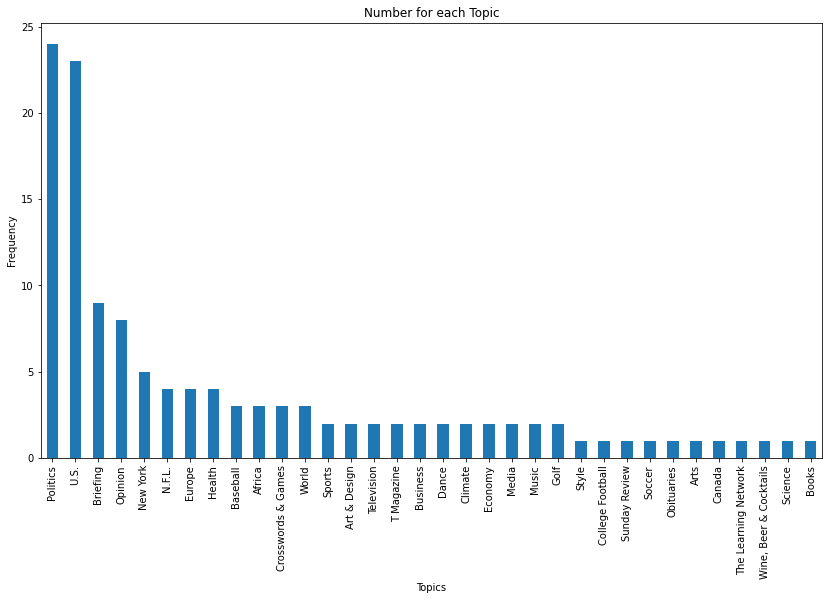

In [19]:
ax = news2020dec['Topic'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each Topic")
ax.set_xlabel("Topics")
ax.set_ylabel("Frequency")



Text(0, 0.5, 'Frequency')

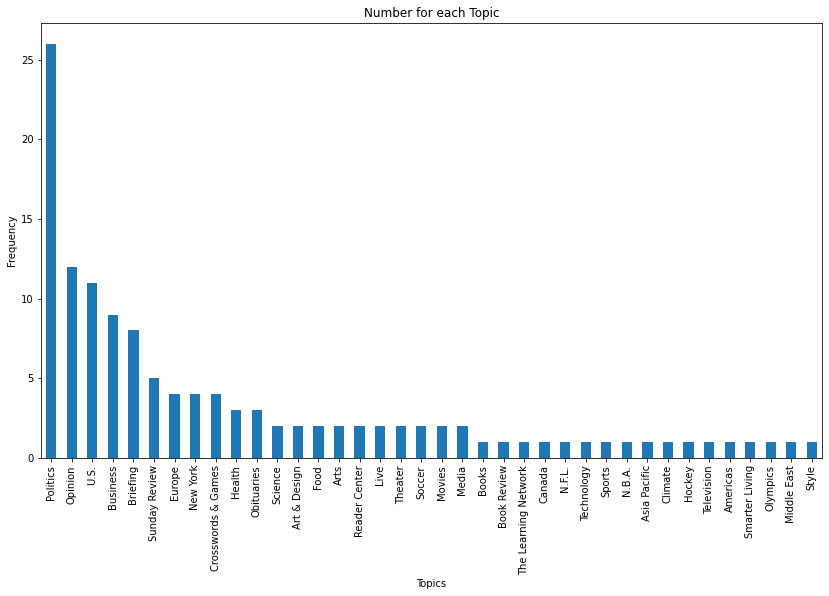

In [20]:
ax = news2019dec['Topic'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each Topic")
ax.set_xlabel("Topics")
ax.set_ylabel("Frequency")

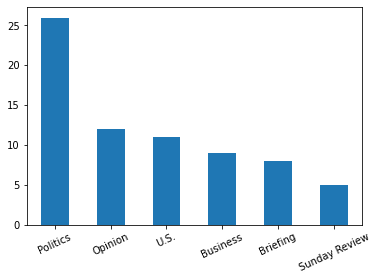

In [21]:
#topics with more than 4 news
prob = news2019dec['Topic'].value_counts()
threshold = 4
mask = prob > threshold
prob = prob.loc[mask]
prob.plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

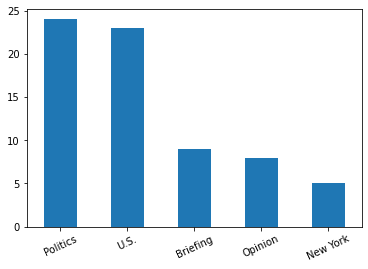

In [22]:
#topics with more than 4 news
prob = news2020dec['Topic'].value_counts()
threshold = 4
mask = prob > threshold
prob = prob.loc[mask]
prob.plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

Topic Distribution as pie chart

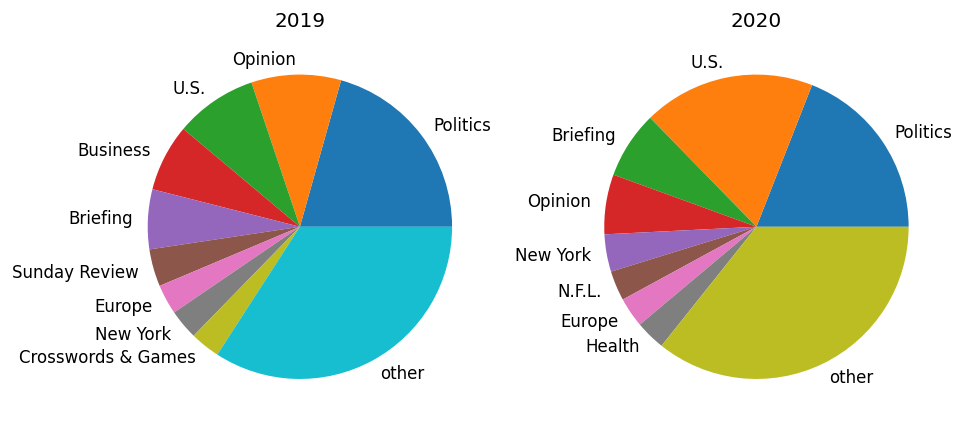

In [66]:
fig = plt.figure(figsize=(9,7),dpi=120)
ax = fig.add_subplot(121)
counts2019 = news2019dec['Topic'].value_counts()
threshold = 3
mask = counts2019 > threshold
tail_prob = counts2019.loc[~mask].sum()
counts2019 = counts2019.loc[mask]
counts2019['other'] = tail_prob
ax.pie(counts2019,labels=counts2019.index)
ax.set_title("2019")

ax = fig.add_subplot(122)
counts2020 = news2020dec['Topic'].value_counts()
mask = counts2020 > threshold
tail_prob = counts2020.loc[~mask].sum()
counts2020 = counts2020.loc[mask]
counts2020['other'] = tail_prob
ax.pie(counts2020,labels=counts2020.index)
ax.set_title("2020")
plt.show()

Topic distribition of only 7 most popular topics

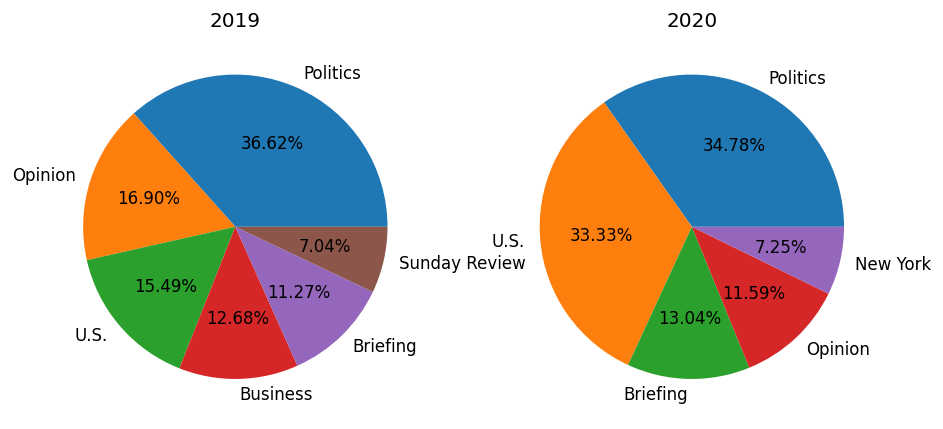

In [67]:
fig = plt.figure(figsize=(9,7),dpi=120)
ax = fig.add_subplot(121)
counts2019 = news2019dec['Topic'].value_counts()
threshold = 4
mask = counts2019 > threshold
counts2019 = counts2019.loc[mask]
ax.pie(counts2019,labels=counts2019.index,autopct='%1.2f%%')
ax.set_title("2019")

ax = fig.add_subplot(122)
counts2020 = news2020dec['Topic'].value_counts()
mask = counts2020 > threshold
counts2020 = counts2020.loc[mask]
ax.pie(counts2020,labels=counts2020.index,autopct='%1.2f%%')
ax.set_title("2020")
plt.show()

In [25]:
#Calculating the average length of titles in 2019 and 2020
sum = 0
numOfNews= 0
for title in news2019dec['Title']:
  sum += len(title)
  numOfNews += 1
print("Average length of the news in 2019 December is " + str(round(sum/numOfNews,2)))
sum = 0
numOfNews= 0
for title in news2020dec['Title']:
  sum += len(title)
  numOfNews += 1
print("Average length of the news in 2020 December is " + str(round(sum/numOfNews,2)))

Average length of the news in 2019 December is 55.17
Average length of the news in 2020 December is 60.92


Then we can see that average length of the titles are 10% longer in 2020 comparing to 2019

#Part 4 - Comparison analysis study

It is clearly seen that first two weeks of December 2020 has much more COVID-19 related news than December 2019

Text(0.5, 1.0, '2020 December')

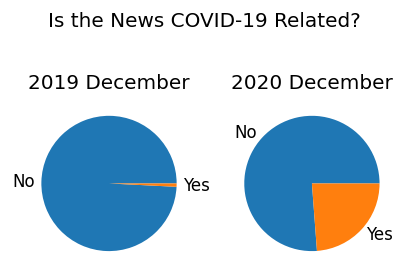

In [26]:
fig = plt.figure(figsize=(4,3),dpi=120)
ax = fig.add_subplot(121)
plt.suptitle("Is the News COVID-19 Related?")
cts = news2019dec["COVID-19 Related"].value_counts().to_frame()
ax.pie(cts["COVID-19 Related"],labels=cts.index)
ax.set_title("2019 December")

ax = fig.add_subplot(122)
cts = news2020dec["COVID-19 Related"].value_counts().to_frame()
ax.pie(cts["COVID-19 Related"],labels=cts.index)
ax.set_title("2020 December")

USA Election happened 2020 November, so it was being discussed one year ago at 2019 December but it continued more even after 1 month later than the election.

Text(0.5, 1.0, '2020')

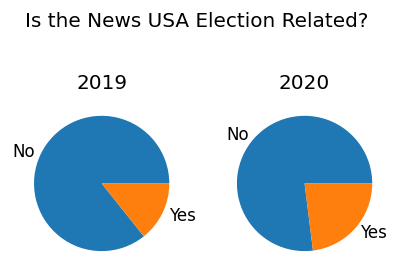

In [27]:
fig = plt.figure(figsize=(4,3),dpi=120)
ax = fig.add_subplot(121)
plt.suptitle("Is the News USA Election Related?")
cts = news2019dec["USA Election Related"].value_counts().to_frame()
ax.pie(cts["USA Election Related"],labels=cts.index)
ax.set_title("2019")

ax = fig.add_subplot(122)
cts = news2020dec["USA Election Related"].value_counts().to_frame()
ax.pie(cts["USA Election Related"],labels=cts.index)
ax.set_title("2020")

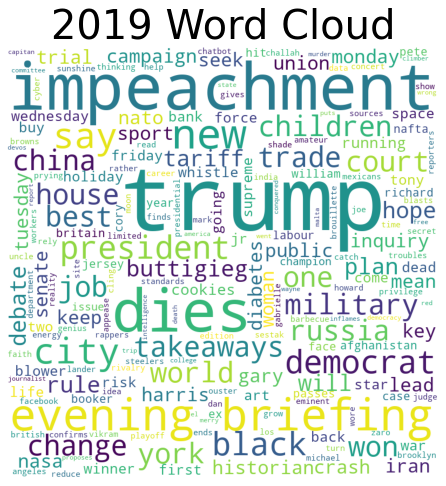

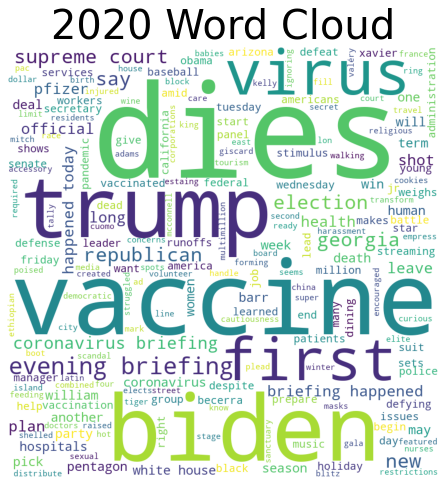

In [56]:
# importing Word Cloud
from wordcloud import WordCloud, STOPWORDS
comment_words_2019 = ''
comment_words_2020 = ''
stopwords = set(STOPWORDS)
 
for title in news2019dec.Title:
    title = str(title)
    words = title.split() 
    # converts each word into lowercase
    for i in range(len(words)):
        words[i] = words[i].lower()   
    comment_words_2019 += " ".join(words)+" "
for title in news2020dec.Title:
    title = str(title)
    words = title.split() 
    for i in range(len(words)):
        words[i] = words[i].lower()   
    comment_words_2020 += " ".join(words)+" "
 
wordcloud2019 = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words_2019)
 
wordcloud2020 = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words_2020)

# plotting the WordCloud images

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud2019)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("2019 Word Cloud",fontsize=40)
plt.show()

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud2020)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("2020 Word Cloud",fontsize=40)
plt.show()

Vaccine becomes one of the most used word in the first two weeks of December 2020, because vaccine against COVID-19 has been produced and countries were starting to vaccinate their citizens. Also, the surname of the newly elected president of USA Biden becomes very popular in 2020 December.

# Part 5 - Interaction with the user

In [68]:
#To search among the all news
frames = [news2019dec, news2020dec]
allNews = pd.concat(frames)

User picks one of the IDs
• The code returns the URL to the news.

In [69]:
# Valid ids -> [2019001,2019126] and [2020001,2020126]
print("Please enter ID of the news to get URL")
id = int(input())
clear_output()

if id < 2019001 or id >2020999:
  print("The id must be between 2019001 and 2020999")
else:
  idFound = False
  for i, row in allNews.iterrows():
    if id == row["id"]:
      idFound = True
      print(row["link"])
      break
  if not idFound:
    print("There is no news with this id")

nytimes.com/2020/12/01/opinion/coronavirus-vaccine-priority.html?searchResultPosition=4


User inputs a topic name
• User gets the list of relevant news articles (their ID, and title)

In [70]:
#The input word will be searched both in topics and titles
#For topics write Politics, Economy, Sports or Media etc.
print("Please enter any word that you want to search among the news")
word = input()
clear_output()
for i, row in allNews.iterrows():
  if word.lower() == row["Topic"].lower():
    print(str(row["id"]) + " " + row["Title"])
  elif str(" "+word.lower()+" ") in str(" "+row["Title"].lower()+" "): 
#this will help to find exact word so if the user type trum, it will get nothing. But if types trump, will get all news about Trump
    print(str(row["id"]) + " " + row["Title"])

2020003 Four Women Who Will Handle the Media in the Biden White House
2020005 Biden Shows Off a New Accessory: A Walking Boot
2020048 Biden has selected Xavier Becerra as his nominee for secretary of health and human services.
2020050 Biden Picks Xavier Becerra to Lead Health and Human Services
2020064 Biden Promises 100 Million Vaccine Shots in 100 Days, but Shortage Worries Rise
2020069 Trump Administration Is Planting Loyalists in Biden Transition Meetings
2020089 Biden clashes with liberals over student loan cancellation.
